<a href="https://colab.research.google.com/github/rohanjarun/Artificial-General-Intelligence/blob/main/AGI_club_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_train = torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
dataset_val = torchvision.datasets.MNIST(
    root="data",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

In [ ]:
len(dataset_val)

10000

In [ ]:
batch_size = 64

#Create data loaders.
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=64)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=batch_size)

for X_batch,y_batch in dataloader_train:
  print(X_batch.shape)
  print(y_batch.shape)
  break

torch.Size([64, 1, 28, 28])
torch.Size([64])


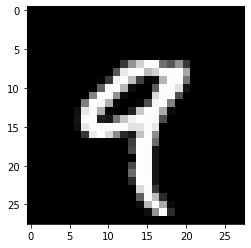

In [ ]:
i = 4
x= X_batch [i]
plt.imshow(torch.reshape(x,(28,28)), cmap = 'gray')

In [ ]:
class SimpleNeuralNetwork(torch.nn.Module) :

  def __init__(self) :
    
    super().__init__()

    self.dense1 = torch.nn.Linear(784,100)
    self.dense2 = torch.nn.Linear(100,10)
    self.dense3 = torch.nn.Linear()
    self.dense4 = torch 


    self.ReLU = torch.nn.ReLU()
    self.Flatten = torch.nn.Flatten()

  def forward(self,x):
    x = self.Flatten(x)
    x = self.dense1(x)
    x = self.ReLU(x)
    x = self.dense2(x)

    return(x)

In [ ]:
model = SimpleNeuralNetwork()

In [ ]:
model.dense2

Linear(in_features=100, out_features=10, bias=True)

In [ ]:

torch.cuda.is_available()
#device = torch.device('cuda')
device = torch.device('cpu')
model = model.to(device)

loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

num_epochs = 5
N_train = len(dataset_train)
N_val = len(dataset_val)

train_losses = []
val_losses = []

In [ ]:
for ep in range(num_epochs):
  
  model.train() 
  train_loss = 0.0

  for X_batch, y_batch in dataloader_train:

    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)

    N_batch = X_batch.shape[0]
    outputs = model(X_batch)
    loss_oneBatch = loss_fun(outputs, y_batch)

    model.zero_grad()
    loss_oneBatch.backward()
    optimizer.step()

    train_loss += loss_oneBatch*N_batch

  model.eval()
  val_loss = 0.0
  for X_batch, y_batch in dataloader_val:

    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)

    with torch.no_grad():

      N_batch = X_batch.shape[0]
      outputs = model(X_batch)

      loss_oneBatch = loss_fun(outputs, y_batch)
      val_loss += loss_oneBatch*N_batch

  train_losses.append(train_loss.item()/N_train)
  val_losses.append(val_loss.item()/N_val)

  print('epoch: ', ep, 'train_loss: ', train_loss/N_train, 'validation loss:', val_loss/N_val)

epoch:  0 train_loss:  tensor(0.3782, grad_fn=<DivBackward0>) validation loss: tensor(0.2140)
epoch:  1 train_loss:  tensor(0.1854, grad_fn=<DivBackward0>) validation loss: tensor(0.1503)
epoch:  2 train_loss:  tensor(0.1328, grad_fn=<DivBackward0>) validation loss: tensor(0.1195)
epoch:  3 train_loss:  tensor(0.1022, grad_fn=<DivBackward0>) validation loss: tensor(0.1041)
epoch:  4 train_loss:  tensor(0.0817, grad_fn=<DivBackward0>) validation loss: tensor(0.0943)


In [ ]:
train_losses

[0.37818317057291667,
 0.18541004231770833,
 0.13278711751302083,
 0.1022017333984375,
 0.08171056315104167]

Text(0.5, 1.0, 'Objective function value versus epoch')

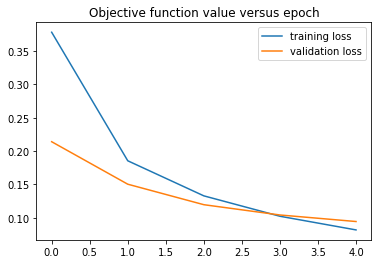

In [ ]:
plt.plot(train_losses, label = 'training loss')
plt.plot(val_losses, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Objective function value versus epoch')

In [ ]:


X_batch, y_batch = next(iter(dataloader_val))
y_pred = model(X_batch)
y_pred = torch.nn.Softmax()(y_pred)
y_pred.shape
num_correct = 0
model.eval()

for X_batch, y_batch in dataloader_val:

  X_batch = X_batch.to(device)
  y_batch = y_batch.to(device)

  with torch.no_grad():

    outputs = model(X_batch)
    num_correct += sum(np.argmax(outputs, axis =1) == y_batch)

print('Accuracy: ', num_correct/N_val)

<ipython-input-14-43ee7fb5f135>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y_pred = torch.nn.Softmax()(y_pred)


Accuracy:  tensor(0.9709)
